# Survival Game - <font size=4 color='gray'>Alexander Bruun, Anton Paris </font>
# <font color='gray'>Code for the simulation </font>
Based on Leonel Aguilar's 2D Cellular Automata


___

### Import Libraries

In [1]:
import numpy as np #matrix and vector library
import matplotlib.pyplot as plt #plotting library
from random import shuffle
import random 

### Define plots to be inlined

In [2]:
#Jupyter magic that makes plots to be inlined in the notebook
%matplotlib inline 

### Create object Cell

In [3]:
class Cell():
    def __init__(self, type_cell, nutrition_level, offspring_change_table):
        self.type_cell = type_cell
        self.lifespan = 0
        self.nutrition_level= nutrition_level
        self.reproduction_count=0
        self.death_probability=1
        self.turn=False
        self.offspring_chance=offspring_chance_table[type_cell]
        
    def increase_l (self, value):
        self.lifespan+= value   
       # print(self.lifespan, "self.lifespan")
        
#TURN 
    def set_turn(self):
        self.turn=True
       # print(self.turn,"after set turn ")
        
    def round_start(self):
       # print(self.turn,"before round start")
        self.turn=False
        
        
    def get_turn(self):
        return self.turn
     
#CHANGE CELLS 
    def death (self):
        self.lifespan=0
      #  print(self.type_cell," before")
        self.type_cell=0 #forest
       # print(self.type_cell," after")
                 
    def eat (self, value):
        self.nutrition_level+= value
        
    def get_type (self):
        return self.type_cell
    
    def copy_attributes(self, coords_2):
       # print("copying attributes,", cells[coords_2[0]][coords_2[1]].type_cell,self.type_cell)
        cells[coords_2[0]][coords_2[1]].type_cell=self.type_cell
        cells[coords_2[0]][coords_2[1]].lifespan = self.lifespan
        cells[coords_2[0]][coords_2[1]].nutrition_level = self.nutrition_level
        cells[coords_2[0]][coords_2[1]].turn= self.turn 
        cells[coords_2[0]][coords_2[1]].reproduction_count=self.reproduction_count
        cells[coords_2[0]][coords_2[1]].death_probability=self.death_probability
        
        
    def get_attributes(self):
        return self.lifespan, self.nutrition_level, self.reproduction_count
    
    def offspring(self):
        self.reproduction_count+=1
        
    def death (self):
        self.lifespan=0
        #print(cells[coords[0]][coords[1]].type_cell," before")
        self.type_cell=0 #forest
        self.nutrition_level=0
        self.reproduction_count=0
        self.death_probability=1
       
        
        #print(cells[coords[0]][coords[1]].type_cell," after")
        
    def death_age(self):
        return (random.randint (1,100) < self.death_probability)
                 
        
    def get_value_death_age(self):
        #type 0 = 0, Rabbit = 5, Wolves=10, Deer=2, Bear=1 
        values=[0,5,10,2,1]
        return values[self.type_cell]
        
        
    def offspring(self,friends):
        values_offspring=[0,0,20,0,40]
        if self.type_cell==1:
             return (friends and self.nutrition_level>=values_offspring[self.type_cell] and random.randint(1,100)<30)
            
        elif self.type_cell==3:
             return (friends and self.nutrition_level>=values_offspring[self.type_cell] and random.randint(1,100)<30)
            
        else:
            return (friends and self.nutrition_level>=values_offspring[self.type_cell])
        
    def birth(self,coords_2,cells):
        self.lifespan=1
        self.nutrition_level=5
        self.reproduction_count=0
        self.death_probability=1
        cells[coords_2[0]][coords_2[1]].reproduction_count+=1
        cells[coords_2[0]][coords_2[1]].nutrition_level-=10
        print(self.type_cell, "type_cell birth", self.nutrition_level, "nutritionlevel birth")

        
    def set_movement(self, cells, coords_1, coords_2, increase_value_lifespan, increase_value_eat, friends):
        #print(coords_1,coords_2)
        
       
        #print("coords_2",cells[coords_2[0]][coords_2[1]].type_cell," coords_1",self.type_cell )
        
        #cells[coords_2[0]][coords_2[1]]=cells[coords_1[0]][coords_1[1]]
        #print("coords_2",cells[coords_2[0]][coords_2[1]].type_cell," coords_1",cells[coords_1[0]][coords_1[1]].type_cell )
        #print(self.turn, "does it function")
        if self.turn==False:
            
            self.set_turn()
            if self.type_cell==0:
                return 
            if self.type_cell==1 or self.type_cell==3:
                self.nutrition_level+=8
            elif self.type_cell!=0 and self.death_age():
                self.death()
              #  print("death by age")
                return 
            
                self.increase_l(increase_value_lifespan)
                self.eat(increase_value_eat)
                self.death_probability+=self.get_value_death_age()
        
            if coords_1!=coords_2:
                if self.type_cell!=0 and self.type_cell!=3:
                    self.nutrition_level-=2
                self.copy_attributes(coords_2)
                if self.offspring(friends)and self.nutrition_level>0 :
                    self.birth(coords_2,cells)
                else:
                    self.death()
               # print("death by movement")
            #print("coords_2",cells[coords_2[0]][coords_2[1]].type_cell," coords_1",cells[coords_1[0]][coords_1[1]].type_cell )
            
            #print("from: ", coords_1, "to: ", coords_2)
        return
    
   

In [4]:
#Needs to be adjusted

def  get_value_eat(states,coords, eat_values):
    eat_values=[0,7,10,15,30]
    return eat_values[cells[coords[0]][coords[1]].type_cell]

## Build Cells

In [5]:
#empty grid
#POST: array created with [rows][colums]
def initGrid(cols,rows,array):
    
    for i in range (rows):
        array.append([1])
        
        for j in range (cols):
            array[i].append(0)
      
            
              

### Fill list randomly, with desired range (types)

In [6]:

#POST: fills Grid with random numbers and the right attributes 
def fillGrid(rows,cols,array):

    for i in range (rows):
        for j in range (cols):
            number=random.randint(1,100)
            if number<=5:
                array[i][j]= Cell(4,10) #atrribute 
            elif number>5 and number<=15:
                 array[i][j]= Cell(2,10) #atrribute 
            elif number>15 and number<=30:
                 array[i][j]= Cell(3,10) #atrribute 
            elif number>30 and number<=60:
                 array[i][j]= Cell(1,10) #atrribute 
            else:
                 array[i][j]= Cell(0,10) #atrribute 
        
            
                    

In [7]:
global r_dim, c_dim, cells #Dimension of the 1D cells space
r_dim= 100
c_dim= 100
 #creating empty cells
cells=[]


In [8]:
initGrid(r_dim, c_dim, cells)
fillGrid(r_dim, c_dim, cells)


In [9]:
cells[1][2].type_cell

0

#### Get informations out of Cells

In [50]:
#To Do 
#Lifespan
#Nutrition Level
#Lifespan
#Reproduction Rate, counter
#[row][column][attribute]
#[i][j][0]= type_cell
#[i][j][1]= lifespan
#[i][j][2]= reproduction counter
#[i][j][3]= nutrition_level
#[i][j][4]= ??


In [51]:

#create a new updated matrix with only the cell types  
#Post: returns 2D array[row][columns] with the current states of the cells, 
def update_grid(r_dim,c_dim,cells):
    grid_list=np.zeros((4,r_dim,c_dim))
  
    for i in range(0,r_dim,1):
        for j in range(0,c_dim,1):
            grid_list[0][i][j]= cells[i][j].type_cell
            grid_list[1][i][j]= cells[i][j].lifespan
            grid_list[2][i][j]= cells[i][j].reproduction_count
            grid_list[3][i][j]= cells[i][j].nutrition_level
            
    return grid_list


In [12]:
grid_list=update_grid(r_dim,c_dim,cells)

In [13]:
cells_m_type= grid_list [0][:][:]

In [14]:
cells_m_type

array([[0., 1., 3., ..., 0., 4., 3.],
       [0., 3., 0., ..., 4., 0., 1.],
       [2., 3., 0., ..., 1., 0., 1.],
       ...,
       [1., 3., 1., ..., 3., 0., 0.],
       [0., 1., 1., ..., 3., 0., 3.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [15]:
cells_m_lifespan=grid_list[1][:][:]

In [48]:
cells_m_lifespan


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
def PlotAutomataHistory(cellHistory,ax=None):
    """
    """
    #cellHistory=cellHistory.transpose()
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(15, 15)) #Determine the number of subplots in the figure and its size (scaling)
        
    minVal=0
    maxVal=5
    
    cmap = plt.cm.gray
    norm = plt.Normalize(minVal,maxVal)
    rgba = cmap(norm(cellHistory))
    #Coloring of the group 
    F = np.argwhere(cellHistory==0)
    R = np.argwhere(cellHistory==1)
    W = np.argwhere(cellHistory==2)
    D = np.argwhere(cellHistory==3)
    B = np.argwhere(cellHistory==4)
    
    #from the range [0,255] to [0.1] -> normalized 
    #green=[159,255,163]
    #white=[255,255,255]
    #grey=[128,128,128]
    #brown=[183,128,86]
    #black=[0,0,0]
    
    green=[0.623,1,0.64]
    white=[1,1,1]
    grey=[0.5,0.5,0.5]
    brown=[0.717,0.5,0.337]
    black=[0,0,0]
    
    
    
    for position,color in zip([F,R,W,D,B],[green,white,grey,brown,black]):
        for pos in position:
            rgba[pos[0]][pos[1],:3]=color
    
    
    ax.imshow(rgba,origin='lower', interpolation='none') #Type of plot 
    #Axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    
    #Major ticks frequency
    mTickNum=1
    xNum=1 #int(cellHistory.shape[0]/mTickNum)
    yNum=1 #int(cellHistory.shape[1]/mTickNum)+1
         
    #Major ticks
    ax.set_xticks(np.arange(0, cellHistory.shape[0], xNum))
    ax.set_yticks(np.arange(0, cellHistory.shape[1], yNum))
    
    #Major tick labels
    ax.set_xticklabels(np.arange(0, cellHistory.shape[0]+1, xNum))
    ax.set_yticklabels(np.arange(0, cellHistory.shape[1]+1, yNum))
    
    # Minor ticks
    ax.set_xticks(np.arange(-.5, cellHistory.shape[0], 1), minor=True);
    ax.set_yticks(np.arange(-.5, cellHistory.shape[1], 1), minor=True)
    

    
    #Add grid
    #Gray line separates cells
    ax.grid(which='minor', axis='x', color='black', linestyle='-', linewidth=1.5)
    #Red line separates generations
    ax.grid(which='minor', axis='y', color='black', linestyle='-', linewidth=1.5)
    #ax.set_axis_off()
    

In [18]:
def PlotLifespan(cell_lifespan, bx=None):
    
    
    if bx is None:
        fig, bx = plt.subplots(1,1, figsize=(15,15))
    
    bx.imshow(cell_lifespan,'Greys',origin='lower')
    bx.set_xlabel('x')
    bx.set_ylabel('y')
    
    mTickNum=1
    xNum=1 #int(cell_lifespan.shape[0]/mTickNum)
    yNum=1 #int(cell_lifespan.shape[1]/mTickNum)+1
         
    #Major ticks
    bx.set_xticks(np.arange(0, cell_lifespan.shape[0], xNum))
    bx.set_yticks(np.arange(0, cell_lifespan.shape[1], yNum))
    
    #Major tick labels
    bx.set_xticklabels(np.arange(0, cell_lifespan.shape[0]+1, xNum))
    bx.set_yticklabels(np.arange(0, cell_lifespan.shape[1]+1, yNum))
    
    # Minor ticks
    bx.set_xticks(np.arange(-.5, cell_lifespan.shape[0], 1), minor=True);
    bx.set_yticks(np.arange(-.5, cell_lifespan.shape[1], 1), minor=True)
    

    
    #Add grid
    #Gray line separates cells
    bx.grid(which='minor', axis='x', color='black', linestyle='-', linewidth=1.5)
    #Red line separates generations
    bx.grid(which='minor', axis='y', color='black', linestyle='-', linewidth=1.5)
    #bx.set_axis_off()
    

### Plot initial state

### Define a function that applies the rule

In [19]:
def filteringstate(mystate, neighstate, rules): #rule [mystate, states allowed to interact]
    filter_states=rules[mystate]
    filtered_neighstate=[]
    
    my_friends=0
    if mystate!=0:
        for friends in neighstate[0]:
            if mystate==friends:
                my_friends+=1
    offspring=(my_friends>0)
    
    #print(filter_states)
    
    
    
    
    for possible in filter_states:
        for neigh in neighstate:
            if possible == neigh[0]:
                filtered_neighstate.append([neigh[1],neigh[2]])
        if len(filtered_neighstate)!=0:
            return filtered_neighstate, offspring 
    return filtered_neighstate, offspring
            
    
    
    

In [20]:
def apply_rule(mystate, mycoords, neighstate, grid, rules, cells):
    
    
   
    neighcoord, offspring=filteringstate(mystate, neighstate, rules)
    #print(neighcoord," neighcoord")
    #print(len(neighcoord),"len(neighcoord)")
    if len(neighcoord)!=0:
        number=(np.random.randint(0,len(neighcoord)))
        #print(number,"number,", mystate, " mystate")
        if mystate==0:
            value_eat=get_value_eat(cells,neighcoord[number])
           # print(mystate,"mystate 0 apply rule", neighcoord[number], value_eat)
            return mycoords, value_eat, False 
        
        elif mystate==1:
            value_eat=get_value_eat(cells,neighcoord[number])
          #  print(mystate,"mystate 1 apply rule", neighcoord[number], value_eat)
            #print (offspring, "offspring")
            return neighcoord[number], value_eat, offspring
        
        elif mystate==2: 
           # print(mystate,"mystate 2 apply rule")
            value_eat=get_value_eat(cells,neighcoord[number])
            print (offspring, "offspring")
            return neighcoord[number], value_eat, offspring 
        
        elif mystate==3:
           # print(mystate,"mystate 3 apply rule")
            value_eat=get_value_eat(cells,neighcoord[number])
            return neighcoord[number], value_eat, offspring 
            
        elif mystate==4:
           # print(mystate,"mystate 4 apply rule")
            value_eat=get_value_eat(cells,neighcoord[number])
            return neighcoord[number], value_eat, offspring 
        
    #Can't move, 
    else:
        return mycoords, 0, False 

### Define Neighborhood

In [21]:
#Takes an idx out of all_idx (shuffled) 
    #calculates the coordinates of a cell based on the idx
    #calculates it's neighborhood periodic boundaries 
    #creates neighstate, [state, row coordinate, column coordinates]
    #returns mycoords, mystate, neighstate 

In [22]:

def idxToCoordinates(idx,r_dim):
    return [idx%r_dim,idx//r_dim]

def getNeighbourhood(idx, r_dim, c_dim):
    neighb = []
    coords = idxToCoordinates(idx, r_dim)
    for j in range(-1, 2, 1):
        for i in range(-1, 2, 1):
            # Handle boundary conditions
            neighb.append([(coords[0] + i)%(r_dim), (coords[1] + j)%(c_dim)])
    #print (coords, neighb)
    return (coords, neighb)

def getNeighbourhoodValues(idx, grid, r_dim, c_dim):
    mycoords,neighCoords=getNeighbourhood(idx, r_dim, c_dim)
    
    mystate=grid[mycoords[0]][mycoords[1]].type_cell
    neighstate=[]
    
    for neighc in neighCoords:
      
        
        #Problem recursion of own coordinates (TO DO) #fixed
        if (neighc[0] != mycoords[0] or neighc[1] != mycoords[1]):
          
            neighstate.append([grid[neighc[0]][neighc[1]].type_cell, neighc[0], neighc[1]])
        
    #print("- Coords ",mycoords," = ",mystate," neigs ",neighstate," = ",neighCoords)
    #print(mycoords,neighstate)
    return mycoords,mystate,neighstate

                                                                         

In [23]:
#filter neighstate only the important states out 

### Define the step Function


In [24]:
#input: state (2D Matrix)
# all_idx is used for the iteration through the grid, (random)

#input is the current state (map with only the cell type information )
#have to give the cells an index 

In [25]:
def step(grid_list,rules, cells):
    """Every timestep the state of the new generation of cells is determined by 
    the previous generation neighborhood
    Input: current state of all cells (state)
    Output: next state of all cells (new_state) 
    """
    for i in range (r_dim):
        for j in range (c_dim):
            cells[i][j].round_start()
            
    all_idx = list(range(0, r_dim*c_dim,1))
    
    shuffle(all_idx)
    
    #Iterate through all cells (C) in the automata and extract its neighbourhood
    for idx in all_idx:
        #print("cell ",mycoords)
        mycoords,mystate,neighstate = getNeighbourhoodValues(idx,cells,r_dim,c_dim)
        #print("cell ",idx," - ",mycoords)

        neighcoord, value_eat, offspring=apply_rule(mystate,mycoords, neighstate, grid_list[0][:][:], rules, cells)
       
        #def set_movement(self, cells, coords_1, coords_2, increase_value_lifespan, increase_value_eat):
        cells[mycoords[0]][mycoords[1]].set_movement(cells,mycoords,neighcoord,1,value_eat, offspring)
        
     
        #print(all_idx)
        #print(mycoords,neighcoord)
        
        
        
      
    grid_list=update_grid(r_dim,c_dim,cells)
   
    
    
    #print(state,"state", cells[5][4].type_cell, "cells")
    return grid_list 

### Define the simulation

In [26]:
def simulation(X,max_steps,rules):
    """Traces the whole evolution of an initial state X through max_steps generations
    Input: X, initial state
    Output: cells_stack.transpose(), matrix stacking the cells state after each timestep 
    """
  
  
    
    grid_list=update_grid(r_dim,c_dim,X)
    cells_stack=[grid_list]
    
    for i in range(max_steps):
        #Moves one step forward
        grid_list=step(grid_list,rules,X)
        #Stores the result
        
        cells_stack.append(grid_list)
        
    #print("cells stack:",cells_stack)
    return cells_stack
    

# Performing the simulation
___

In [27]:
max_steps=30 #Number of timesteps
results=simulation(cells,max_steps,rules) #Perform simulation and store its results

3 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
True offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
3 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
3 type_cell birth 5 nutritionlevel birth
False offspring
True offspring
False offspring
True offspring
3 type_cell birth 5 nutritionlevel birth
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
Fals

False offspring
False offspring
True offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
1 type_cell birth 5 nutritionlevel birth
False offspring
True offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
True offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
True offspring
True offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
True offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nut

False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
True offspring
False offspring
True offspring
False offspring
False offspring
True offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
Fa

False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
1 type_cell birth 5 nutritionlevel birth
False offspring
3 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
True offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
True offspring
1 type_cell birth 5 nutritionlevel birth
True offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
Fals

False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
3 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
True offspring
False offspring
3 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False off

1 type_cell birth 5 nutritionlevel birth
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring

False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspr

True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
1 type_cell birth

False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
True offspring
False offspring
False offspring
3 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring

True offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
True offspring
True offspring
False offspring
True offspring
False offspring
False offspring
True offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring

False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspr

False offspring
False offspring
False offspring
False offspring
True offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
True offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False 

False offspring
False offspring
True offspring
False offspring
False offspring
True offspring
False offspring
False offspring
True offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
True offspring
False offspring
True offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
Fal

False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
1 type_cell birth 5 nutritionlevel birth
False offspring
True offspring
True offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
Fal

False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offsp

False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspr

False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offs

False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offs

False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offsprin

False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False offspring
True offspring
False offspring
False offspring
False offspring
False offspring
False offspring
False off

## Plot results

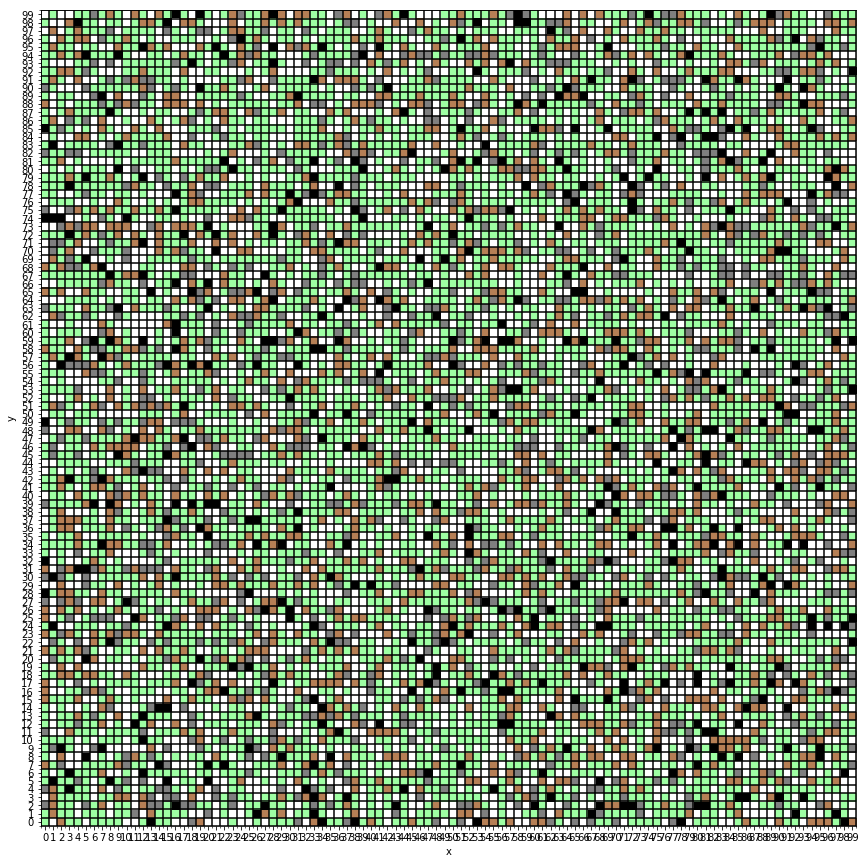

In [28]:
PlotAutomataHistory(results[0][0])

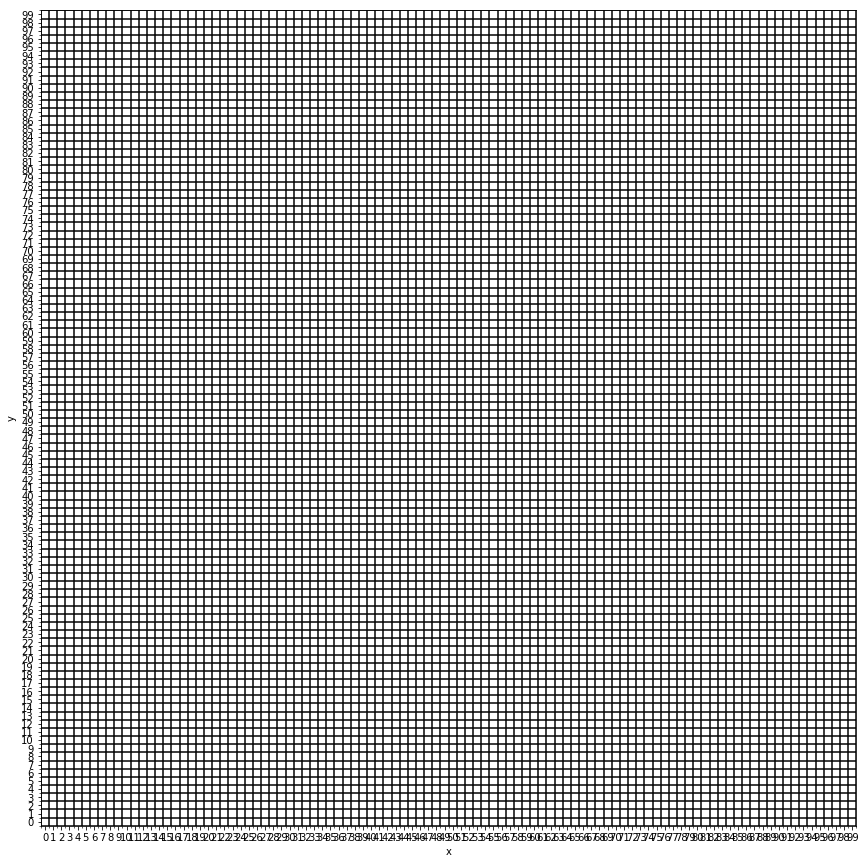

In [29]:
PlotLifespan(results[0][1])

In [30]:
### Visualize Results



import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml" #style of the plot 
from copy import deepcopy #for creating a compunt object and copying existing objects into it 
import pandas as pd



In [56]:
def filter_attribute(r_dim, c_dim, results, state, max_steps,attribute):
    filtered=np.zeros((max_steps+1,r_dim,c_dim))
    for k in range(max_steps+1):
        for i in range(r_dim):
            for j in range(c_dim):
                if results[k][0][i][j]==state:
                    filtered[k][i][j]=results[k][attribute][i][j]
    return filtered                
    

In [32]:
%%capture
# Build plot
fig, ax = plt.subplots(figsize=(15,15))
resultsCopy= deepcopy(results)

def animate(j):
    ax.clear()
    PlotAutomataHistory(results[j][0],ax=ax)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(results))

In [33]:
ani

In [34]:
%%capture
# Build plot
fig2, bx = plt.subplots(figsize=(15,15))
resultsCopy_lifespan= deepcopy(results)

def animate_life(j):
    bx.clear()
    PlotLifespan(results[j][1],bx=bx)
    
ani_life = matplotlib.animation.FuncAnimation(fig2, animate_life, frames=len(results))

In [35]:
ani_life

In [57]:
filtered_state1=filter_attribute(r_dim,c_dim,results,1,max_steps,0)
filtered_state2=filter_attribute(r_dim,c_dim,results,2,max_steps,0)
filtered_birth_wolves=filter_attribute(r_dim,c_dim,results,2,max_steps,2)

In [58]:
filtered_birth_wolves

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [59]:
results_type=results[:][0]
stacked=[results[:][0].flatten() for results in results]
stacked_state1=[filtered_state1.flatten() for filtered_state1 in filtered_state1]
stacked_state2=[filtered_state2.flatten() for filtered_state2 in filtered_state2]
stacked_birth=[filtered_birth_wolves.flatten()for filtered in filtered_birth_wolves]

In [60]:
df_type = pd.DataFrame(stacked)
dlifespan_1=pd.DataFrame(stacked_state1)
dlifespan_2=pd.DataFrame(stacked_state2)
dbirth_wolves=pd.DataFrame(stacked_birth)

In [61]:
filtered_test=filter_attribute(r_dim,c_dim,results,1,max_steps,0)

In [62]:
A=dlifespan_1.sum(axis='columns')
B=dlifespan_2.sum(axis='columns')
C=dbirth_wolves.sum(axis='columns')

array([[[ 0.,  1.,  3., ...,  0.,  4.,  3.],
        [ 0.,  3.,  0., ...,  4.,  0.,  1.],
        [ 2.,  3.,  0., ...,  1.,  0.,  1.],
        ...,
        [ 1.,  3.,  1., ...,  3.,  0.,  0.],
        [ 0.,  1.,  1., ...,  3.,  0.,  3.],
        [ 1.,  0.,  1., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        ..

In [64]:
F = df_type[df_type==0].count(axis='columns')
R = df_type[df_type==1].count(axis='columns')
W = df_type[df_type==2].count(axis='columns')
D = df_type[df_type==3].count(axis='columns')
B = df_type[df_type==4].count(axis='columns')


In [65]:
x = np.arange(0.0, max_steps+1, 1)

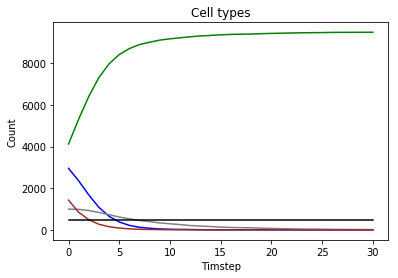

In [66]:
plt.plot(x,F,'green', label='Forest')
plt.plot(x,R,'blue', label='Rabbit')
plt.plot(x,W,'grey', label='Wolves')
plt.plot(x,D,'brown',label='Deer')
plt.plot(x,B,'black',label='Bear')
plt.xlabel('Timstep')
plt.ylabel('Count')
plt.title('Cell types')
plt.show()

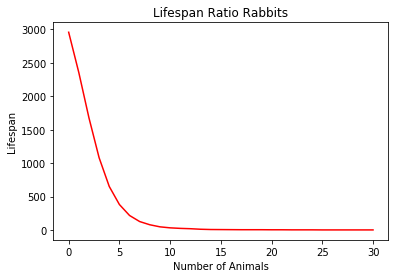

In [67]:
plt.plot(x,R,'red',label='S')
plt.xlabel('Number of Animals')
plt.ylabel('Lifespan')
plt.title('Lifespan Ratio Rabbits')
plt.show()

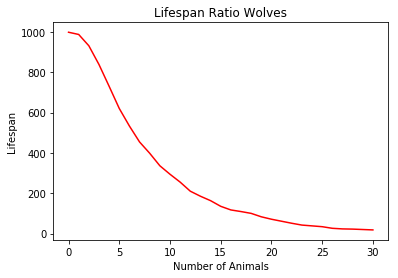

In [68]:
plt.plot(x,W,'red',label='S')
plt.xlabel('Number of Animals')
plt.ylabel('Lifespan')
plt.title('Lifespan Ratio Wolves')
plt.show()